## Observations and Insights
1. Capomulin is the drug treatment that show the most promise in reducing tumor growth in mice.

2. Both Capomulin and Ramicane had the best results in mice completing the study.  Use of the other drugs results in multiple mouse deaths during the study.

3. There was a correlation between mouse weight and tumor volume.


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mousestudy = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combined_mousestudy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:

# Create a GroupBy object based upon "View Group"
combined_mousestudy_group = combined_mousestudy.groupby("Drug Regimen")

# Find how many rows fall into each bin
print(combined_mousestudy_group["Drug Regimen"].count())

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


##Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
study_means = combined_mousestudy.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
study_medians = combined_mousestudy.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
study_variances = combined_mousestudy.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_devs = combined_mousestudy.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = combined_mousestudy.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
study_summary_stats = pd.DataFrame({"Mean Tumor Volume": study_means,
                                    "Median Tumor Volume": study_medians,
                                    "Tumor Volume Vaiance": study_variances,
                                    "Tumor Volume Std. Dev.": std_devs,
                                    "Tumor Volume Std. Err.": sems})

study_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Vaiance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar plots

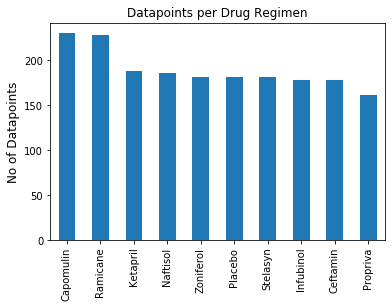

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints = combined_mousestudy["Drug Regimen"].value_counts()
datapoints.plot(kind="bar")
plt.ylabel('No of Datapoints', fontsize=12)
plt.title('Datapoints per Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


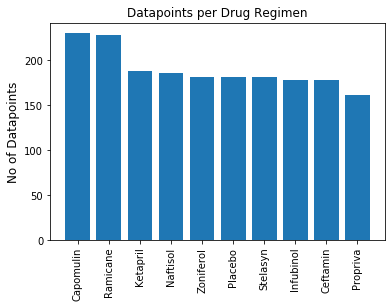

In [5]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot

datapoints = combined_mousestudy["Drug Regimen"].value_counts()
plt.bar(datapoints.index.values, datapoints.values)
plt.ylabel('No of Datapoints', fontsize=12)
plt.title('Datapoints per Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_mousestudy_group = combined_mousestudy.groupby("Sex")
# Find how many rows fall into each bin
mouse_sex_counts = combined_mousestudy_group["Sex"].value_counts()

print (mouse_sex_counts)


Sex     Sex   
Female  Female    935
Male    Male      958
Name: Sex, dtype: int64


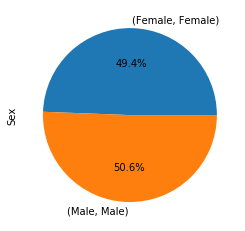

In [7]:
mouse_sex_counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

([<matplotlib.patches.Wedge at 0x1a23b99d90>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Female'),
  Text(0.723018791840255, 0.8290017048509963, 'Male')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

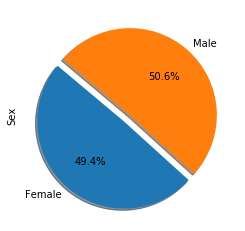

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a group based on the value os sex
#Matplotlib plt.pie
labels = ["Female", "Male"]
# colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)
plt.ylabel("Sex")
plt.pie(mouse_sex_counts, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

final_tumor_volume = combined_mousestudy.groupby(["Mouse ID"]).max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge the two dataframes to get the final tumor volume for each mouse across the 4 treatments
merged_mousestudy  = final_tumor_volume[['Mouse ID', 'Timepoint']].merge(combined_mousestudy,on=['Mouse ID','Timepoint'],how='left')
capomulin_ftv = merged_mousestudy.loc[merged_mousestudy["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)'] 
ramicane_ftv = merged_mousestudy.loc[merged_mousestudy["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']                                               
infubinol_ftv = merged_mousestudy.loc[merged_mousestudy["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']                                               
ceftamin_ftv = merged_mousestudy.loc[merged_mousestudy["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']                                               

In [10]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_quartiles = capomulin_ftv.quantile([.25, .5, .75])
capo_lowerquartile = capo_quartiles[0.25]
capo_upperquartile = capo_quartiles[0.75]
capo_iqr = capo_upperquartile - capo_lowerquartile
capo_lower_bound = capo_lowerquartile - (1.5*capo_iqr)
capo_upper_bound = capo_upperquartile - (1.5*capo_iqr)
print(f"Capomulin potential outliers: (capomulin_ftv.loc[(capomulin_ftv < capo_lower_bound) | (capomulin_ftv > capo_upper_bound)])")

rami_quartiles = ramicane_ftv.quantile([.25, .5, .75])
rami_lowerquartile = rami_quartiles[0.25]
rami_upperquartile = rami_quartiles[0.75]
rami_iqr = rami_upperquartile - rami_lowerquartile
rami_lower_bound = rami_lowerquartile - (1.5*rami_iqr)
rami_upper_bound = rami_upperquartile - (1.5*rami_iqr)
print(f"Ramicane potential outliers: (ramicane_ftv.loc[(ramicane_ftv < rami_lower_bound) | (ramicane_ftv > rami_upper_bound)])")

ceft_quartiles = ceftamin_ftv.quantile([.25, .5, .75])
ceft_lowerquartile = ceft_quartiles[0.25]
ceft_upperquartile = ceft_quartiles[0.75]
ceft_iqr = ceft_upperquartile - ceft_lowerquartile
ceft_lower_bound = ceft_lowerquartile - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperquartile - (1.5*ceft_iqr)
print(f"Ceftamin potential outliers: (ceftamin_ftv.loc[(ceftamin_ftv < ceft_lower_bound) | (ceftamin_ftv > ceft_upper_bound)])")

infu_quartiles = infubinol_ftv.quantile([.25, .5, .75])
infu_lowerquartile = infu_quartiles[0.25]
infu_upperquartile = infu_quartiles[0.75]
infu_iqr = infu_upperquartile - infu_lowerquartile
infu_lower_bound = infu_lowerquartile - (1.5*infu_iqr)
infu_upper_bound = infu_upperquartile - (1.5*infu_iqr)
print(f"Infubinol potential outliers: (infubinul_ftv.loc[(infubinol_ftv < infu_lower_bound) | (infubinol_ftv > infu_upper_bound)])")


Capomulin potential outliers: (capomulin_ftv.loc[(capomulin_ftv < capo_lower_bound) | (capomulin_ftv > capo_upper_bound)])
Ramicane potential outliers: (ramicane_ftv.loc[(ramicane_ftv < rami_lower_bound) | (ramicane_ftv > rami_upper_bound)])
Ceftamin potential outliers: (ceftamin_ftv.loc[(ceftamin_ftv < ceft_lower_bound) | (ceftamin_ftv > ceft_upper_bound)])
Infubinol potential outliers: (infubinul_ftv.loc[(infubinol_ftv < infu_lower_bound) | (infubinol_ftv > infu_upper_bound)])


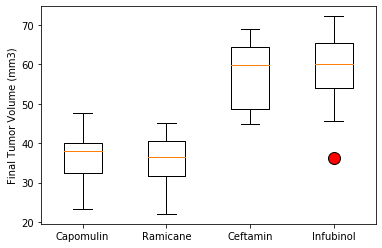

In [11]:
# Generate a box plot of the fina tumor volume of each mouse scross four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin_ftv,ramicane_ftv,ceftamin_ftv,infubinol_ftv],labels=['Capomulin','Ramicane','Ceftamin','Infubinol'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and scatter plots

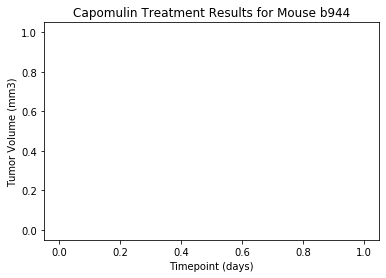

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_study_results = combined_mousestudy.loc[combined_mousestudy["Drug Regimen"]=="Capomulin"]

mousedata_b944 = capomulin_study_results.loc[capomulin_study_results['Mouse ID'] == 'b944']

plt.plot(mousedata_b944['Timepoint'],mousedata_b944['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment Results for Mouse b944')
plt.show()

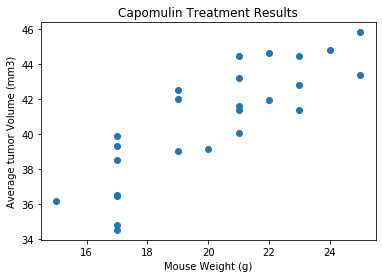

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# so for each mouse that had capomulin, calculate the average tumor volume and plot weight against that value

capo_mouse_weight = capomulin_study_results.groupby(capomulin_study_results['Mouse ID'])['Weight (g)'].mean()
capo_tumor_volume = capomulin_study_results.groupby(capomulin_study_results['Mouse ID'])['Tumor Volume (mm3)'].mean()

plt.scatter(capo_mouse_weight, capo_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average tumor Volume (mm3)')
plt.title('Capomulin Treatment Results')
plt.show()


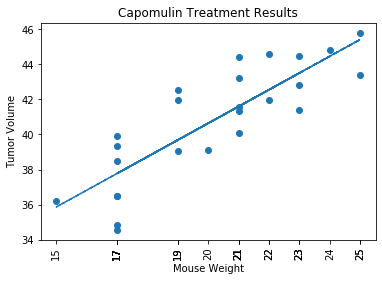

The correlation between weight and tumor volume is 0.84


In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen

capo_mouse_weight = capomulin_study_results.groupby(capomulin_study_results['Mouse ID'])['Weight (g)'].mean()
capo_tumor_volume = capomulin_study_results.groupby(capomulin_study_results['Mouse ID'])['Tumor Volume (mm3)'].mean()

slope,int,r,p,std_err = st.linregress(capo_mouse_weight,capo_tumor_volume)
fit = slope * capo_mouse_weight + int

plt.scatter(capo_mouse_weight, capo_tumor_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatment Results')
plt.plot(capo_mouse_weight,fit,'--')
plt.xticks(capo_mouse_weight, rotation=90)
plt.show()

corr = round(st.pearsonr(capo_mouse_weight, capo_tumor_volume)[0],2)
print(f'The correlation between weight and tumor volume is {corr}')
